# Scenario: **Confidence Interval**

###**Dataset Description**



Dataset from Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)

The columns in this dataset:

- **age**
- **anaemia**
- **creatinine_phosphokinase**
- **diabetes**
- **ejection_fraction**
- **high_blood_pressure**
- **platelets**
- **serum_creatinine**
- **serum_sodium**
- **sex**
- **smoking**
- **time**	
- **DEATH_EVENT**
    
Lets perform inferential statitics on this dataset

# Topics covered: Confidence Interval
    

# Objectives
In this demo we will estimate the confidence interval of an estimate 


You can also download the dataset from [**here**](https://www.dropbox.com/s/kr6f2lednm1pvc4/heart_failure_clinical_records_dataset%20%281%29.csv)

In [ ]:
#Please run this cell in Google Colab to download the dataset
!wget https://www.dropbox.com/s/kr6f2lednm1pvc4/heart_failure_clinical_records_dataset%20%281%29.csv

--2021-02-10 10:55:03--  https://www.dropbox.com/s/kr6f2lednm1pvc4/heart_failure_clinical_records_dataset%20%281%29.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/kr6f2lednm1pvc4/heart_failure_clinical_records_dataset%20%281%29.csv [following]
--2021-02-10 10:55:03--  https://www.dropbox.com/s/raw/kr6f2lednm1pvc4/heart_failure_clinical_records_dataset%20%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca2e1002bd53f0d300804a625fe.dl.dropboxusercontent.com/cd/0/inline/BIrZFl6tMR5UFU5apYDHDhS8iXNxveSTzicHgUQQOecNabUazAGbhsQxYdYdokI2gDAHVR7S_FmeBoszRZ6OeTHHp6U0dYNE2t2gA8GjOctdCcuz2PF-qrp-OJVj681BXeE/file# [following]
--2021-02-10 10:55:04--  https://uca2e1002bd53f0d300804a625fe.dl.dropboxusercontent.com/cd/

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://www.dropbox.com/s/kr6f2lednm1pvc4/heart_failure_clinical_records_dataset%20%281%29.csv

--2021-04-03 17:16:48--  https://www.dropbox.com/s/kr6f2lednm1pvc4/heart_failure_clinical_records_dataset%20%281%29.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/kr6f2lednm1pvc4/heart_failure_clinical_records_dataset%20%281%29.csv [following]
--2021-04-03 17:16:49--  https://www.dropbox.com/s/raw/kr6f2lednm1pvc4/heart_failure_clinical_records_dataset%20%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd6fc74867f77ecb2074841a62a.dl.dropboxusercontent.com/cd/0/inline/BL4UgVkx3Heb731DU7d0uVy1D7wEV27YQu-9rj1-r1qSg__CI4Re3Mvy4T5dGsCQEBYk3M_wJcZV0teJLoUTJUPfabuM0uSZVB4NK4eGrONOuqa3w0mAr9ntvQSlEbVcTONdTscPXpdWh_jXjWXo0VGM/file# [following]
--2021-04-03 17:16:49--  https://ucd6fc74867f77ecb2074841a62a.dl.dro

In [ ]:
data = pd.read_csv('heart_failure_clinical_records_dataset (1).csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


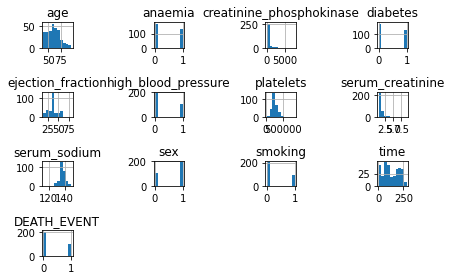

In [ ]:
#data[~data.applymap(np.isreal).all]
data.hist()
plt.tight_layout()

In [ ]:
# reading data

data = pd.read_csv('/content/heart_failure_clinical_records_dataset (1).csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Confidence Interval

A confidence interval proposes a range of plausible values for an unknown parameter. This interval is associted with a confidence level that the parameter is located in the interval.

$ Confidence Interval = [Point Estimate-Margin of Error, Point Estimate+Margin of Error]$

### 1. Find the confidence interval of average of blood platelets in a human with 95% confidence level
Let us find the Point Estimate

In [ ]:
# Collecting data

blood_platelets = data.platelets.sample(40, random_state = 1)
blood_platelets

173    189000.00
287    543000.00
51     418000.00
146    218000.00
214    290000.00
197    259000.00
274    150000.00
62     254000.00
27     284000.00
201    377000.00
112    252000.00
119    263358.03
11     253000.00
244    264000.00
110    306000.00
295    270000.00
73     149000.00
105    621000.00
265    362000.00
107    226000.00
188    201000.00
12     136000.00
70     374000.00
18     237000.00
88     235000.00
108    304000.00
298    395000.00
176    105000.00
120    210000.00
250    404000.00
85     406000.00
296    742000.00
132    263358.03
285    336000.00
131    250000.00
78     283000.00
253    236000.00
138    221000.00
90     249000.00
189    275000.00
Name: platelets, dtype: float64

In [ ]:
# Finding mean of the sample as a point estimate to the population

point_estimate = blood_platelets.mean()
print('The point estimation of blood platelets is:',point_estimate)

The point estimation of blood platelets is: 295267.90150000004


We have the point estimate of the population mean. Let us find out the Margin of Error in order to find the confidence interval.

If we know sample statistics then $ Margin of Error = Critical Value*Standard Error of Sample$ <br>

As we do not know anything about population, we are going to calculate the Margin of Error using sample statistics

Let us find the critical value of the <b>95% confidence level</b> and with <b>19 degrees of freedom</b>

### Critical Value

We calculate the critical value using Percent Point Function(PPF) which is an inverse of Cumulative Distributive Function(CDF)

<b>Cumulative Distribution Function(CDF):</b> The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.

<b>Percent Point Function(PPF):</b> The percent point function (ppf) is the inverse of the cumulative distribution function. That is, for a distribution function we calculate the probability that the variable is less than or equal to x for a given x.

In [ ]:
# Student t-distribution Percent Point Function
from scipy.stats import t
# define probability
p = 0.95
df = 19

# retrieve value <= probability
critical_value = t.ppf(p, df)
print("The critical value of 95% confidence level and with 19 degrees of freedom:",critical_value)

The critical value of 95% confidence level and with 19 degrees of freedom: 1.729132811521367


In [ ]:
# Standard deviation of sample

se = blood_platelets.std()/np.sqrt(39)
print("The standard deviation of the sample is:",se)

The standard deviation of the sample is: 20008.11074333843


In [ ]:
# Margin of error

error = critical_value * se
print("The Margin of Error is:", error)

The Margin of Error is: 34596.68078285965


As we have the point estimation and the margin of error, we can calculate the confidence interval of the estimate

$ Confidence Interval = [Point Estimate-Margin of Error, Point Estimate+Margin of Error]$

In [ ]:
# Calculating the confidence interval

lower_bound = point_estimate-error
upper_bound = point_estimate+error

print("The confidence interval of average of the blood platelets in a human is [{}, {}]".format(lower_bound,upper_bound))

The confidence interval of average of the blood platelets in a human is [260671.2207171404, 329864.5822828597]


### Inference 
The confidence interval of average of blood platelets in a human is [260671.2207171404,329864.5822828597] with 95% confidence level